In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from Python_code import examples as eg
import numpy as np
from numpy import *
import dionysus

The circular coordinates pipeline for examining different smoothness cost-functions:

    Step 1. Getting the point cloud
    Step 2. Computing the Vietoris-Rips filtration and its cohomology
    Step 3. Selecting the Cocycle
    Step 4. First smoothing using Least Squares (Optional)
    Step 5. Second smoothing using a new cost function

## Perform PCA (with different components) and compute the bottleneck distance between the PCA+CC persistent diagrams and the CC persistent diagrams above.

[[-3.14798279e-02  2.66511057e-01 -3.56941745e-02  5.38368942e-04
   8.55673377e-02 -1.00125088e-01 -1.20484956e-01 -2.31455163e-01
   1.58108476e-01 -1.78924763e-01 -4.89045850e-02 -4.62146751e-01
   1.58457658e-01 -3.40100647e-01  3.96551220e-02 -4.32733818e-01
   3.46410470e-01 -1.32998511e-01  2.17452357e-01  2.31743919e-01]
 [-1.90184479e-01 -8.45873455e-02 -1.64847771e-01 -1.29920718e-01
   2.34607996e-01 -7.04617377e-02  1.14893805e-01  3.77510615e-01
  -2.90006346e-01 -1.15346887e-01 -1.76186994e-01 -1.54959427e-01
  -9.21290349e-02  2.96795155e-01  1.45419216e-01 -8.67816863e-02
  -4.54551156e-01 -4.19333313e-01 -4.77165445e-02  1.85607642e-01]
 [ 1.62383513e-01 -2.03299752e-01  1.56255739e-01  1.78963814e-02
  -7.58919819e-02  3.20223437e-01  2.19347355e-01 -2.60277272e-01
  -2.91126863e-01 -1.42723979e-01 -1.15016034e-01  5.31913421e-01
  -2.59029972e-01  2.13600647e-01  1.29899027e-01 -7.86962824e-02
   9.12685069e-02 -2.50596025e-01 -2.06553839e-01  1.80381609e-01]
 [-1.10

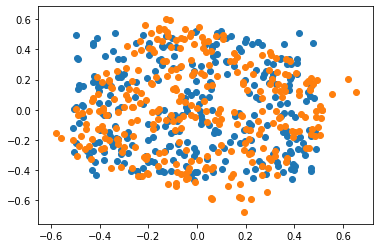

In [7]:
import numpy as np
from Python_code import PCAtool as PCAtool
X=np.random.rand(300,2)
def sample_spherical(npoints, ndim=3):
    vec = np.random.randn(ndim, npoints)
    vec /= np.linalg.norm(vec, axis=0)
    return vec

dat1=np.array(sample_spherical(50,20).T)

print(dat1)
X_new=PCAtool.pca(X,K=2)
import matplotlib.pyplot as plt
X_cen=X-np.mean(X,axis=0)
plt.scatter(X_cen[:,0], X_cen[:,1])
plt.scatter(X_new[:,0], X_new[:,1])
plt.show()

[[0.00000000e+00 1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 5.84497094e-01 8.34239200e-02]
 [2.00000000e+00 5.85042715e-01 8.33332837e-02]
 [3.00000000e+00 5.84405482e-01 8.32026005e-02]
 [4.00000000e+00 5.85456014e-01 8.34705606e-02]
 [5.00000000e+00 5.85674524e-01 8.32355991e-02]
 [6.00000000e+00 5.85528612e-01 8.34258497e-02]
 [7.00000000e+00 5.85082531e-01 8.34214315e-02]
 [8.00000000e+00 5.84607005e-01 8.33004564e-02]
 [9.00000000e+00 5.85623384e-01 8.29938427e-02]
 [1.00000000e+01 5.84758878e-01 8.35041329e-02]
 [1.10000000e+01 5.82257867e-01 8.35240930e-02]
 [1.20000000e+01 5.43982029e-01 8.33936632e-02]
 [1.30000000e+01 5.03304720e-01 8.32529813e-02]
 [1.40000000e+01 4.38634306e-01 8.31381977e-02]
 [1.50000000e+01 4.02843535e-01 8.35763812e-02]
 [1.60000000e+01 3.50962460e-01 8.30866843e-02]
 [1.70000000e+01 2.91640759e-01 9.02490467e-02]
 [1.80000000e+01 2.37426937e-01 8.88814032e-02]
 [1.90000000e+01 1.46934524e-01 7.81186819e-02]
 [2.00000000e+01 1.19222761e-07 2.386777

[Text(0, 0.5, 'Bottleneck distance'),
 Text(0.5, 0, '# of principal components (k)'),
 Text(0.5, 1.0, 'Bottleneck distance between full sample diagram and k-PCA sample diagrams')]

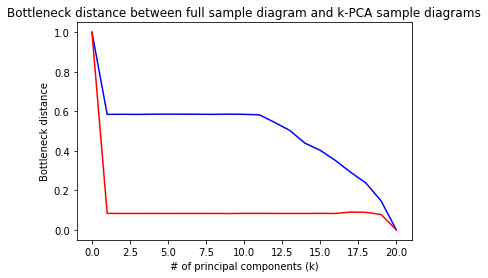

In [8]:
#Let us compute the bottle-neck distance between full dataset and k-PCA dataset. k denotes the number of principal components.
prime=23
D=20
#dat1=np.random.rand(50,D)


vr = dionysus.fill_rips(dat1, 2, 2.) #Vietoris-Rips complex
cp = dionysus.cohomology_persistence(vr, prime, True) #Create the persistent cohomology
dgms = dionysus.init_diagrams(cp, vr) #Calculate the persistent diagram using the designated coefficient field.
#record for plottings..
A=np.array([0,1,1])


for k in range(D):
    dat_k = PCAtool.pca(dat1,K=k+1)
    vr_k = dionysus.fill_rips(dat_k, 2, 4.) #Vietoris-Rips complex
    cp_k = dionysus.cohomology_persistence(vr_k, prime, True) #Create the persistent cohomology
    dgms_k = dionysus.init_diagrams(cp_k, vr_k) #Calculate the persistent diagram using the designated coefficient field.
    bdist_0 = dionysus.bottleneck_distance(dgms[0], dgms_k[0])
    bdist_1 = dionysus.bottleneck_distance(dgms[1], dgms_k[1])
    #dionysus.plot.plot_diagram(dgms_k[1], show=True) 
    newrow=[k+1,bdist_0,bdist_1]
    print(newrow)
    A = numpy.vstack([A, newrow])

print(A)
print(A[1,2])

fig, ax = plt.subplots()
ax.plot(A[:,0],A[:,1],c='b')#dimension 0 diagram distance
ax.plot(A[:,0],A[:,2],c='r')#dimension 1 diagram distance
ax.set(xlabel='# of principal components (k)', ylabel='Bottleneck distance',
       title='Bottleneck distance between full sample diagram and k-PCA sample diagrams')

In [5]:
type(dgms)
type(dgms[0])
#From diagrams to arrays
#np.array(dgms[0])
#From arrays to diagrams
#print( type([(0,1),(0.5,0.7)]) )
dionysus._dionysus.Diagram([(0,1),(0.5,0.7)])

Diagram with 2 points

In [6]:
def denoise_dgm(dgms,threshold=0.1):
    threshold = .1
    bars_0 = [np.array(bar).tolist() for bar in dgms[0] if bar.death-bar.birth > threshold] #choosing cocycle that persist at least threshold=1.
    bars_1 = [np.array(bar).tolist() for bar in dgms[1] if bar.death-bar.birth > threshold] #choosing cocycle that persist at least threshold=1.
    #cocycles = [cp.cocycle(bar.data) for bar in bars]
    #plt is the matplotlib incarnation.
    #print( type(bars_1) )
    #bars_1=np.array(bars_1)
    #print(type(bars_1[1]))
    #print(bars_1[1])
    #print(type(bars_1))

    dgm_denoise_0=bars_0
    dgm_denoise_1=bars_1
    #print(type(dgm_denoise_0))
    #dionysus.plot.plot_diagram(dgm_denoise_0, show=False)
    #dionysus.plot.plot_diagram(dgm_denoise_1, show=False)
    return([dgm_denoise_0,dgm_denoise_1])

'''
#Red highlight cocyles that persist more than threshold value on barcode, when more than one cocyles have persisted over threshold values, this plots the first one.
dionysus.plot.plot_bars(dgms[1], show=False)
plt.plot([[bar.birth,bar.death] for bar in dgms[1] if bar.death-bar.birth > threshold][0],[[x,x] for x,bar in enumerate(dgms[1]) if bar.death-bar.birth > threshold][0],'r')
plt.title('Showing the selected cycles on bar codes (red bars)')
plt.show()

#Red highlight ***ALL*** cocyles that persist more than threshold value on diagram.
dionysus.plot.plot_diagram(dgms[1], show=False)
Lt1 = [[point.birth,point.death] for point in dgms[1] if point.death-point.birth > threshold] 
for Lt3 in Lt1:
    #print(Lt3)
    plt.plot(Lt3[0],Lt3[1],'ro')
plt.title('Showing the selected cycles on diagram (red points)')
plt.show()
'''
print(dgms_k)
test1=denoise_dgm(dgms_k)
test1[0]


[Diagram with 50 points, Diagram with 49 points, Diagram with 18424 points]


[(0,inf),
 (0,1.40403),
 (0,1.3332),
 (0,1.4289),
 (0,1.40229),
 (0,1.403),
 (0,1.34595),
 (0,1.32887),
 (0,1.37156),
 (0,1.29584),
 (0,1.39248),
 (0,1.64584),
 (0,1.23297),
 (0,1.47286),
 (0,1.39124),
 (0,1.19594),
 (0,1.12187),
 (0,1.28163),
 (0,1.4383),
 (0,1.4698),
 (0,1.20281),
 (0,1.25048),
 (0,1.31941),
 (0,1.33678),
 (0,1.17107),
 (0,1.34541),
 (0,1.42859),
 (0,1.32976),
 (0,1.54038),
 (0,1.23253),
 (0,1.32246),
 (0,1.42239),
 (0,1.2203),
 (0,1.34523),
 (0,1.22457),
 (0,1.22807),
 (0,1.33558),
 (0,1.32693),
 (0,1.08975),
 (0,1.24706),
 (0,1.20635),
 (0,1.31939),
 (0,1.53156),
 (0,1.13285),
 (0,1.01112),
 (0,1.13553),
 (0,1.30935),
 (0,1.36507),
 (0,1.27896),
 (0,1.54502)]

In [9]:
'''
#This is legacy code used to construct a dionysus.plot.plot_diagram object from raw, it is necessary to compute bottleneck distance.
dgms_tmp=denoise_dgm(dgms_k,0.1)
dgms_base_0=dionysus._dionysus.Diagram()
dgms_base_1=dionysus._dionysus.Diagram()
#pybind issue, need to be correct instead of succint.
for itr in range(len(dgms_tmp[0])):
    dgms_base_0.append(dgms_tmp[0][itr])
for itr in range(len(dgms_tmp[1])):
    dgms_base_1.append(dgms_tmp[1][itr])
print(type(dgms_base[0]))
dionysus.bottleneck_distance(dgms_base_0, dgms_base_1)
'''

'\ndgms_tmp=denoise_dgm(dgms_k,0.1)\ndgms_base_0=dionysus._dionysus.Diagram()\ndgms_base_1=dionysus._dionysus.Diagram()\n#pybind issue, need to be correct instead of succint.\nfor itr in range(len(dgms_tmp[0])):\n    dgms_base_0.append(dgms_tmp[0][itr])\nfor itr in range(len(dgms_tmp[1])):\n    dgms_base_1.append(dgms_tmp[1][itr])\nprint(type(dgms_base[0]))\ndionysus.bottleneck_distance(dgms_base_0, dgms_base_1)\n'

In [10]:
#Let us compute the bottle-neck distance between full dataset and k-PCA dataset. k denotes the number of principal components.
prime=23
D=10
#Here is the data insertion part
dat1=np.random.rand(50,D)
vr = dionysus.fill_rips(dat1, 2, 2.) #Vietoris-Rips complex
cp = dionysus.cohomology_persistence(vr, prime, True) #Create the persistent cohomology
dgms = dionysus.init_diagrams(cp, vr) #Calculate the persistent diagram using the designated coefficient field.
#record for plottings..
A=np.array([0,0,1,1])

for thres in [0,0.1]:
    #######Thresholding the features on the persistent diagrams describing persistent cohomology of VR complex(CC)
    dgms_tmp=denoise_dgm(dgms,thres)#thresholding CC diagrams
    dgms_base_0=dionysus._dionysus.Diagram()#take persistent points of dim 0
    dgms_base_1=dionysus._dionysus.Diagram()#take persistent points of dim 1
    #pybind issue, need to be correct instead of succint.
    for itr in range(len(dgms_tmp[0])):
        dgms_base_0.append(dgms_tmp[0][itr])
    for itr in range(len(dgms_tmp[1])):
        dgms_base_1.append(dgms_tmp[1][itr])
    #print(type(dgms_base[0]))
    #dionysus.bottleneck_distance(dgms_base_0, dgms_base_1)
    #######
    for k in range(D):
        dat_k = PCAtool.pca(dat1,K=k+1)
        vr_k = dionysus.fill_rips(dat_k, 2, 4.) #Vietoris-Rips complex
        cp_k = dionysus.cohomology_persistence(vr_k, prime, True) #Create the persistent cohomology
        dgms_k = dionysus.init_diagrams(cp_k, vr_k) #Calculate the persistent diagram using the designated coefficient field.
        #######Thresholding the features on the persistent diagrams describing persistent cohomology of kPCA-VR complex(kPCA)
        #############Here we use the same thresholding for fairness. But this configuration is easy to change.
        PCA_thres=thres
        #############
        dgms_k_tmp=denoise_dgm(dgms_k,PCA_thres)#thresholding CC diagrams
        dgms_k_0=dionysus._dionysus.Diagram()#take persistent points of dim 0
        dgms_k_1=dionysus._dionysus.Diagram()#take persistent points of dim 1
        #pybind issue, need to be correct instead of succint.
        for itr in range(len(dgms_k_tmp[0])):
            dgms_k_0.append(dgms_k_tmp[0][itr])
        for itr in range(len(dgms_k_tmp[1])):
            dgms_k_1.append(dgms_k_tmp[1][itr])
        #print(type(dgms_base[0]))
        #dionysus.bottleneck_distance(dgms_base_0, dgms_base_1)
        #######
        bdist_0 = dionysus.bottleneck_distance(dgms_base_0, dgms_k_0)
        bdist_1 = dionysus.bottleneck_distance(dgms_base_1, dgms_k_1)
        #dionysus.plot.plot_diagram(dgms_k[1], show=True) 
        newrow=[k+1,thres, bdist_0,bdist_1]
        #print(newrow)
        A = numpy.vstack([A, newrow])
print(A)
#Column names of A
#1 number of principal components k; 
#2 threshold used for filtering out topological features by persistence;
#3 Bottleneck distance between dimension 0 diagrams of CC and PCA
#3 Bottleneck distance between dimension 1 diagrams of CC and PCA

[[0.00000000e+00 0.00000000e+00 1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 0.00000000e+00 5.32168150e-01 8.48593563e-02]
 [2.00000000e+00 0.00000000e+00 5.33484817e-01 8.48593563e-02]
 [3.00000000e+00 0.00000000e+00 5.33195853e-01 8.48593563e-02]
 [4.00000000e+00 0.00000000e+00 5.33411741e-01 8.46603960e-02]
 [5.00000000e+00 0.00000000e+00 5.30841947e-01 8.50518048e-02]
 [6.00000000e+00 0.00000000e+00 4.94617045e-01 8.49809349e-02]
 [7.00000000e+00 0.00000000e+00 3.85514319e-01 8.47640336e-02]
 [8.00000000e+00 0.00000000e+00 3.00773650e-01 8.47401023e-02]
 [9.00000000e+00 0.00000000e+00 1.68912739e-01 8.53575021e-02]
 [1.00000000e+01 0.00000000e+00 1.19829949e-07 5.98311871e-08]
 [1.00000000e+00 1.00000000e-01 5.32168150e-01 8.48593563e-02]
 [2.00000000e+00 1.00000000e-01 5.33484817e-01 8.48593563e-02]
 [3.00000000e+00 1.00000000e-01 5.33195853e-01 8.48593563e-02]
 [4.00000000e+00 1.00000000e-01 5.33411741e-01 8.46603960e-02]
 [5.00000000e+00 1.00000000e-01 5.30841947e-01 8.505180